# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [2]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# First and foremost, I decided to encode the information of non-numerical type as categorical variables
# I decided to encode them using LabelEncoder to give each distinct feature a categorical number to differentiate between them
encoder = LabelEncoder()
X['artists'] = encoder.fit_transform(X['artists'])
X['album_name'] = encoder.fit_transform(X['album_name'])
X['track_name'] = encoder.fit_transform(X['track_name'])
X['explicit'] = encoder.fit_transform(X['explicit'])
X['track_genre'] = encoder.fit_transform(X['track_genre'])

#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [4]:
# Before separating the data into train and test groups I decided to scale them using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# And then I'm separating them into train and test categories with the given parameters.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [5]:
# Dropping energy and categorical features
X = data.drop(['energy', 'artists', 'album_name', 'track_name', 'explicit', 'mode', 'track_genre'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

# Start trining using StatsModels of given types.
# training -> predicting tests -> counting RMSE and R**2
model_linear_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_ridge_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.03, L1_wt=0, refit=True)
model_lasso_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.05, L1_wt=1, refit=True)
model_elasticnet_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4, refit=True)
y_pred_linear_sm = model_linear_sm.predict(sm.add_constant(X_test))
y_pred_ridge_sm = model_ridge_sm.predict(sm.add_constant(X_test))
y_pred_lasso_sm = model_lasso_sm.predict(sm.add_constant(X_test))
y_pred_elasticnet_sm = model_elasticnet_sm.predict(sm.add_constant(X_test))

rmse_linear_sm = np.sqrt(mean_squared_error(y_test, y_pred_linear_sm))
rmse_ridge_sm = np.sqrt(mean_squared_error(y_test, y_pred_ridge_sm))
rmse_lasso_sm = np.sqrt(mean_squared_error(y_test, y_pred_lasso_sm))
rmse_elasticnet_sm = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet_sm))
r2_linear_sm = r2_score(y_test, y_pred_linear_sm)
r2_ridge_sm = r2_score(y_test, y_pred_ridge_sm)
r2_lasso_sm = r2_score(y_test, y_pred_lasso_sm)
r2_elasticnet_sm = r2_score(y_test, y_pred_elasticnet_sm)
print("--StatsModels (type: rmse r**2)--")
print("Linear: ", rmse_linear_sm, r2_linear_sm)
print("Ridge: ", rmse_ridge_sm, r2_ridge_sm)
print("Lasso: ", rmse_lasso_sm, r2_lasso_sm)
print("ElasticNet: ", rmse_elasticnet_sm, r2_elasticnet_sm)
print()

# Start trining using sklearn of given types.
# training -> predicting tests -> counting RMSE and R**2
model_linear_sk = LinearRegression()
model_ridge_sk = Ridge(alpha=0.03)
model_lasso_sk = Lasso(alpha=0.05)
model_elasticnet_sk = ElasticNet(alpha=0.01, l1_ratio=0.4)
model_linear_sk.fit(X_train, y_train)
model_ridge_sk.fit(X_train, y_train)
model_lasso_sk.fit(X_train, y_train)
model_elasticnet_sk.fit(X_train, y_train)
y_pred_linear_sk = model_linear_sk.predict(X_test)
y_pred_ridge_sk = model_ridge_sk.predict(X_test)
y_pred_lasso_sk = model_lasso_sk.predict(X_test)
y_pred_elasticnet_sk = model_elasticnet_sk.predict(X_test)

rmse_linear_sk = mean_squared_error(y_test, y_pred_linear_sk, squared=False)
rmse_ridge_sk = mean_squared_error(y_test, y_pred_ridge_sk, squared=False)
rmse_lasso_sk = mean_squared_error(y_test, y_pred_lasso_sk, squared=False)
rmse_elasticnet_sk = mean_squared_error(y_test, y_pred_elasticnet_sk, squared=False)
r2_linear_sk = r2_score(y_test, y_pred_linear_sk)
r2_ridge_sk = r2_score(y_test, y_pred_ridge_sk)
r2_lasso_sk = r2_score(y_test, y_pred_lasso_sk)
r2_elasticnet_sk = r2_score(y_test, y_pred_elasticnet_sk)
print("--sklearn (type: rmse r**2)--")
print("Linear: ", rmse_linear_sk, r2_linear_sk)
print("Ridge: ", rmse_ridge_sk, r2_ridge_sk)
print("Lasso: ", rmse_lasso_sk, r2_lasso_sk)
print("ElasticNet: ", rmse_elasticnet_sk, r2_elasticnet_sk)

# As we can see, Linear works almost the same way
# Ridge and ElasticNet differ only a bit
# Lasso shows the most staggering diffeence (0.136->0.147 for rmse, 0.703->0.655 for r**2)

--StatsModels (type: rmse r**2)--
Linear:  0.12158651872170566 0.764702214186539
Ridge:  0.12300212192124695 0.7591912852403508
Lasso:  0.13650812123405268 0.7034049001304584
ElasticNet:  0.1218750224260949 0.7635842477809481

--sklearn (type: rmse r**2)--
Linear:  0.12158651872170566 0.764702214186539
Ridge:  0.1215865180271719 0.7647022168747032
Lasso:  0.14710210470605875 0.6555828522908377
ElasticNet:  0.12247674919739045 0.7612440001254096


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [6]:
X = data.drop(['energy'], axis=1)

encoder = LabelEncoder()
X['artists'] = encoder.fit_transform(X['artists'])
X['album_name'] = encoder.fit_transform(X['album_name'])
X['track_name'] = encoder.fit_transform(X['track_name'])
X['explicit'] = encoder.fit_transform(X['explicit'])
X['track_genre'] = encoder.fit_transform(X['track_genre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

# Start trining using StatsModels of given types.
# training -> predicting tests -> counting RMSE and R**2
model_linear_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_ridge_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.03, L1_wt=0, refit=True)
model_lasso_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.05, L1_wt=1, refit=True)
model_elasticnet_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4, refit=True)
y_pred_linear_sm = model_linear_sm.predict(sm.add_constant(X_test))
y_pred_ridge_sm = model_ridge_sm.predict(sm.add_constant(X_test))
y_pred_lasso_sm = model_lasso_sm.predict(sm.add_constant(X_test))
y_pred_elasticnet_sm = model_elasticnet_sm.predict(sm.add_constant(X_test))

rmse_linear_sm = np.sqrt(mean_squared_error(y_test, y_pred_linear_sm))
rmse_ridge_sm = np.sqrt(mean_squared_error(y_test, y_pred_ridge_sm))
rmse_lasso_sm = np.sqrt(mean_squared_error(y_test, y_pred_lasso_sm))
rmse_elasticnet_sm = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet_sm))
r2_linear_sm = r2_score(y_test, y_pred_linear_sm)
r2_ridge_sm = r2_score(y_test, y_pred_ridge_sm)
r2_lasso_sm = r2_score(y_test, y_pred_lasso_sm)
r2_elasticnet_sm = r2_score(y_test, y_pred_elasticnet_sm)
print("--StatsModels (type: rmse r**2)--")
print("Linear: ", rmse_linear_sm, r2_linear_sm)
print("Ridge: ", rmse_ridge_sm, r2_ridge_sm)
print("Lasso: ", rmse_lasso_sm, r2_lasso_sm)
print("ElasticNet: ", rmse_elasticnet_sm, r2_elasticnet_sm)
print()

# Start trining using sklearn of given types.
# training -> predicting tests -> counting RMSE and R**2
model_linear_sk = LinearRegression()
model_ridge_sk = Ridge(alpha=0.03)
model_lasso_sk = Lasso(alpha=0.05)
model_elasticnet_sk = ElasticNet(alpha=0.01, l1_ratio=0.4)
model_linear_sk.fit(X_train, y_train)
model_ridge_sk.fit(X_train, y_train)
model_lasso_sk.fit(X_train, y_train)
model_elasticnet_sk.fit(X_train, y_train)
y_pred_linear_sk = model_linear_sk.predict(X_test)
y_pred_ridge_sk = model_ridge_sk.predict(X_test)
y_pred_lasso_sk = model_lasso_sk.predict(X_test)
y_pred_elasticnet_sk = model_elasticnet_sk.predict(X_test)

rmse_linear_sk = mean_squared_error(y_test, y_pred_linear_sk, squared=False)
rmse_ridge_sk = mean_squared_error(y_test, y_pred_ridge_sk, squared=False)
rmse_lasso_sk = mean_squared_error(y_test, y_pred_lasso_sk, squared=False)
rmse_elasticnet_sk = mean_squared_error(y_test, y_pred_elasticnet_sk, squared=False)
r2_linear_sk = r2_score(y_test, y_pred_linear_sk)
r2_ridge_sk = r2_score(y_test, y_pred_ridge_sk)
r2_lasso_sk = r2_score(y_test, y_pred_lasso_sk)
r2_elasticnet_sk = r2_score(y_test, y_pred_elasticnet_sk)
print("--sklearn (type: rmse r**2)--")
print("Linear: ", rmse_linear_sk, r2_linear_sk)
print("Ridge: ", rmse_ridge_sk, r2_ridge_sk)
print("Lasso: ", rmse_lasso_sk, r2_lasso_sk)
print("ElasticNet: ", rmse_elasticnet_sk, r2_elasticnet_sk)

# There are not any significant differences in the metrics of quality after the addition of categorical features

--StatsModels (type: rmse r**2)--
Linear:  0.12149377640896371 0.7650610325569185
Ridge:  0.12291232074334105 0.7595427753115882
Lasso:  0.13650812123405268 0.7034049001304584
ElasticNet:  0.12180460487275602 0.7638573637825894

--sklearn (type: rmse r**2)--
Linear:  0.12149377640896371 0.7650610325569185
Ridge:  0.12149377578001137 0.7650610349893956
Lasso:  0.14710210470605875 0.6555828522908377
ElasticNet:  0.12246418361050546 0.76129298828653


#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

In [7]:
for feature, coef in zip(columns, model_linear_sm.params):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_ridge_sm.params):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_lasso_sm.params):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_elasticnet_sm.params):
    print(f"{feature}: {coef}")
print()
print()
print()
print()
for feature, coef in zip(columns, model_linear_sk.coef_):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_ridge_sk.coef_):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_lasso_sk.coef_):
    print(f"{feature}: {coef}")
print()
print()
for feature, coef in zip(columns, model_elasticnet_sk.coef_):
    print(f"{feature}: {coef}")

artists: 0.6415174607596822
album_name: 0.0009179218742947812
track_name: -0.00020043686111630464
popularity: -0.0028827797592661866
duration_ms: -0.0020701930238847975
explicit: 0.0048872291733674245
danceability: -0.001830694573647959
key: -0.03261854990091362
loudness: 0.001248352687626946
mode: 0.1351659056831443
speechiness: -0.004041121122755181
acousticness: 0.027810366747601012
instrumentalness: -0.10594895375846236
liveness: 0.03488180599261386
valence: 0.025868868782699964
tempo: 0.04106342947617548
time_signature: 0.007306422561401029
track_genre: 0.006086305721892832


artists: 0.6228467238034651
album_name: 0.00088044155622649
track_name: -0.00042188918109651777
popularity: -0.0029024256848772917
duration_ms: -0.002278062690763247
explicit: 0.005084759809062765
danceability: -0.001527561516510276
key: -0.02974024710651372
loudness: 0.0013833904982690848
mode: 0.12996689299237452
speechiness: -0.004160102372160227
acousticness: 0.02660760299054739
instrumentalness: -0.10486

### Conclusions
By looking at weights and coefficients we can determine which exact features are the most important for predicting the popularit of the track. Here it's evident that artists_name is significant (0.6415), and album_name and track_name are less significant while also relevant. In LinearRegression and ElasticNet models track_genre is also quite significant. 

0 coefficient means that this coefficient was insignificant when predicting the results, and small numbers mean that those coefficients were not quite important for the predictions. 

The overall significance can be calculated by summing all absolute coefficients. Here we can see that the significance = around 1.15, so it has some sort of predictability. And out of all the presented models Linear Regression seems to be the most significant.

In addition, if the coefficient is positive, it means that it worked positively for the prediction of the result, and negative ones reacted negatively.

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [8]:
data = pd.read_csv('dataset.csv')
y = data['energy']
X = data.drop(['energy'], axis=1)
encoder = LabelEncoder()
X['artists'] = encoder.fit_transform(X['artists'])
X['album_name'] = encoder.fit_transform(X['album_name'])
X['track_name'] = encoder.fit_transform(X['track_name'])
X['explicit'] = encoder.fit_transform(X['explicit'])
X['track_genre'] = encoder.fit_transform(X['track_genre'])

# I decided to implement the Backward Elimination algorithm
X = sm.add_constant(X)
columns = X.columns.tolist()
model = sm.OLS(y, X).fit()
while len(columns)>0:
    model = sm.OLS(y, X[columns]).fit()
    p_values = model.pvalues  # finding pvalues
    max_p_value = p_values.max()  # biggest pvalue
    max_p_index = p_values.idxmax()
    if max_p_value > 0.05:  # here 0.05 is a certain threshold
        columns.remove(max_p_index)
    else:
        break

print("Chosen features are:")
print(columns)
print()

# Training the model with selected features
X_ch = X[columns]
model_ch = sm.OLS(y, X_ch).fit()
y_pred_ch = model_ch.predict(X_ch)
rmse_ch = mean_squared_error(y, y_pred_ch, squared=False)
r2_ch = r2_score(y, y_pred_ch)
print("RMSE (selected features):", rmse_ch)
print("R**2 (selected features):", r2_ch)
# The results are most similar to those of Linear regression in StatsModels or sklearn

Chosen features are:
['const', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

RMSE (selected features): 0.12169824446369086
R**2 (selected features): 0.7659028801510237


#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

a_poss = np.logspace(-4, 3, num=100) # a from 10**-4 to 10**3
best_rmse = float('inf')
best_a = None
for a in a_poss: # cross-validation
    lasso = Lasso(alpha=a)
    kfold = KFold(n_splits=5, shuffle=True, random_state=7) #5-fold CV
    rmse_scores = np.sqrt(-cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=kfold))
    rmse_mean = np.mean(rmse_scores)
    if rmse_mean < best_rmse:
        best_rmse = rmse_mean
        best_a = a

print("Best a:", best_a)
print("Best RMSE:", best_rmse)

Best a: 0.0001
Best RMSE: 0.12174279350719996


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [10]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        l, d = X.shape
        if self.w0 is None:
            self.w0 = np.random.normal(size=d)
        self.w = self.w0.copy()
        
        if self.gd_type == 'GradientDescent':
            for i in range(self.max_iter):  # until the max number of iterations is not exceeded
                gd = self.calc_gradient(X, y)  # finding gradient
                self.w -= self.eta * gd  # from the task
                loss = self.calc_loss(X, y)  # finding loss
                self.loss_history.append(loss)  # updating loss_history
                if np.linalg.norm(self.w - self.w0) < self.tolerance:  # the condition related to tolerance
                    break
                self.w0 = self.w.copy()
                
        elif self.gd_type == 'StochasticDescent':
            for i in range(self.max_iter):
                indices = np.random.choice(l, size=int(l*self.delta), replace=False)
                X_batch = X[indices]
                y_batch = y
                gd = self.calc_gradient(X_batch, y_batch)
                self.w -= self.eta * gd  # from the task
                loss = self.calc_loss(X, y)
                self.loss_history.append(loss)
                if np.linalg.norm(self.w - self.w0) < self.tolerance:
                    break
                self.w0 = self.w.copy()
                
        elif self.gd_type == 'Momentum':
            curr = np.zeros(d)  # from the task
            for i in range(self.max_iter):
                gd = self.calc_gradient(X, y)
                curr = self.alpha * curr + self.eta * gd  # from the task
                self.w -= curr  # from the task
                loss = self.calc_loss(X, y)
                self.loss_history.append(loss)
                if np.linalg.norm(self.w - self.w0) < self.tolerance:
                    break
                self.w0 = self.w.copy()
                
        elif self.gd_type == 'Adagrad':
            G = np.zeros(d)  # from the task
            for i in range(self.max_iter):
                gd = self.calc_gradient(X, y)
                G += gd**2  # from the task
                self.w -= (self.eta / np.sqrt(G + 10**(-self.max_iter))) * gd  # from the task
                loss = self.calc_loss(X, y)
                self.loss_history.append(loss)
                if np.linalg.norm(self.w - self.w0) < self.tolerance:
                    break
                self.w0 = self.w.copy()
                
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        l, d = X.shape
        if self.gd_type == 'GradientDescent':
            gd = -2*np.dot(X.T, y-np.dot(X, self.w)) / l
        elif self.gd_type == 'StochasticDescent':
            gd = -2*np.dot(X.T, y-np.dot(X, self.w)) / X.shape[0]  # the shape for stochastic is different from others
        elif self.gd_type == 'Momentum':
            gd = -2*np.dot(X.T, y-np.dot(X, self.w)) / l
        elif self.gd_type == 'Adagrad':
            gd = -2*np.dot(X.T, y-np.dot(X, self.w)) / l
        return gd

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        l = X.shape[0]
        loss = np.sum((y-np.dot(X, self.w))**2) / l
        return loss

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [11]:
# Load the dataset
data = pd.read_csv('dataset.csv')
y = data['energy']
X = data.drop(['energy'], axis=1)
encoder = LabelEncoder()
X['artists'] = encoder.fit_transform(X['artists'])
X['album_name'] = encoder.fit_transform(X['album_name'])
X['track_name'] = encoder.fit_transform(X['track_name'])
X['explicit'] = encoder.fit_transform(X['explicit'])
X['track_genre'] = encoder.fit_transform(X['track_genre'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

ridge_models = []  # This is for task 9, in order to not train the models twice
types = ['GradientDescent', 'StochasticDescent','Momentum', 'Adagrad']

def train_ridge(alpha, max_iter, type):  # Training the models
    ridge = LinReg(alpha=alpha, max_iter=max_iter, gd_type=type)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return ridge, rmse, r2

# DISCLAIMER
# Dear assistant/tutor
# If you want to check if it's working, you can uncomment the next two lines in order to illustrate the process and not break your computer))
# alphas = [0.01, 0.1]
# max_iters = [100, 1000]
# Here's the full set I tested on, but it may work for a long time
alphas = [0.0001, 0.001, 0.01, 0.1]
max_iters = [10, 100, 1000, 10000]
# One more possible way would be to create cycles for alphas and max_iters, but I thought it was not a good idea, as it will take too much time 
# And won't be very representative visually. That is why I chose only a few possible parameters for alpha and for max_iter.

for alpha in alphas:
    for max_iter in max_iters:
        print("Alpha:", alpha, "; Max iter:", max_iter)
        for type in types:
            model, rmse, r2 = train_ridge(alpha, max_iter, type)
            ridge_models.append(model)
            print("(", type, ")\t", "RMSE:", rmse, "\tR**2:", r2)
        print("-------------------------------")

Alpha: 0.0001 ; Max iter: 10
( GradientDescent )	 RMSE: 4.2494393950672595 	R**2: -286.4155574213582
( StochasticDescent )	 RMSE: 3.9029188283857237 	R**2: -241.45214504524895
( Momentum )	 RMSE: 2.6458472639058184 	R**2: -110.42343246519651
( Adagrad )	 RMSE: 3.713710938449535 	R**2: -218.5144866394067
-------------------------------
Alpha: 0.0001 ; Max iter: 100
( GradientDescent )	 RMSE: 0.8570235481329554 	R**2: -10.69048429385374
( StochasticDescent )	 RMSE: 1.0499227279360195 	R**2: -16.545335084563366
( Momentum )	 RMSE: 0.9749491943266376 	R**2: -14.12902575230316
( Adagrad )	 RMSE: 4.26929222451877 	R**2: -289.1073670392415
-------------------------------
Alpha: 0.0001 ; Max iter: 1000
( GradientDescent )	 RMSE: 0.6524851434307487 	R**2: -5.7762317064136655
( StochasticDescent )	 RMSE: 0.6864137800163652 	R**2: -6.499269823495897
( Momentum )	 RMSE: 0.6525569168683131 	R**2: -5.777722560872698
( Adagrad )	 RMSE: 1.504877970098183 	R**2: -35.04537614524829
---------------------

My prediction was that for the better predictability we need a higher number of iterations and a smaller number as alpha.
This notion was indeed true and worked well for this dataset in particular. 
However, I also know that sometimes models can be overtrained and show worse results, so it's better to find the right balance of the alpha coefficient and the number of iterations.

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

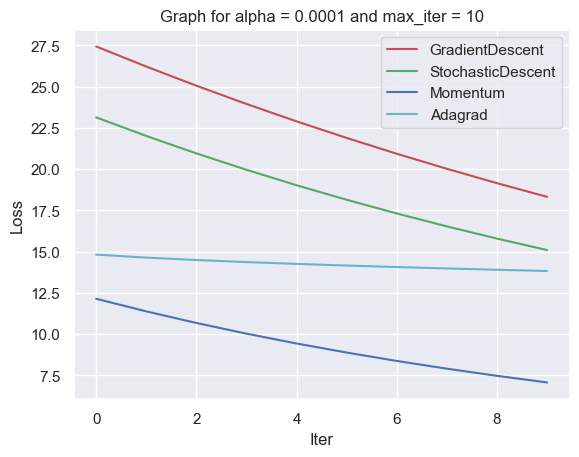

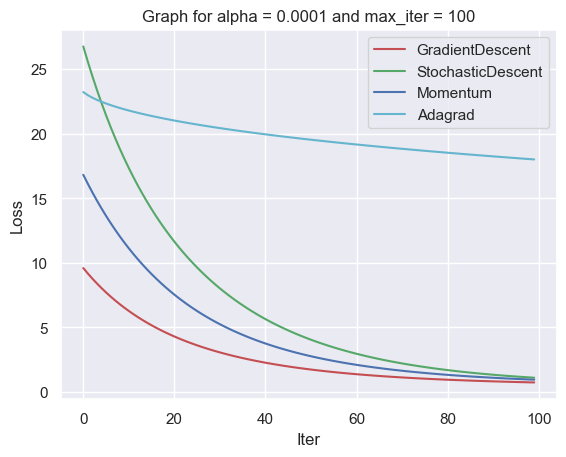

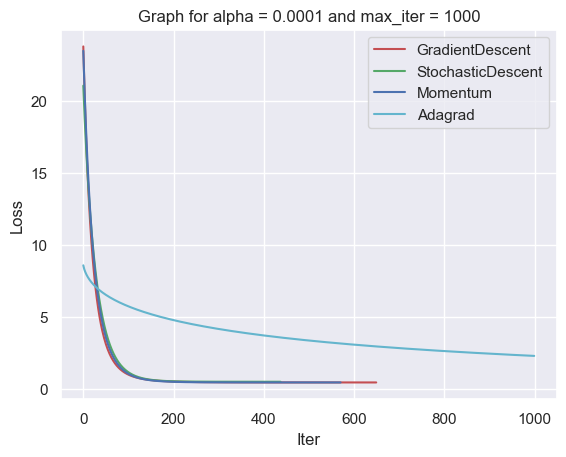

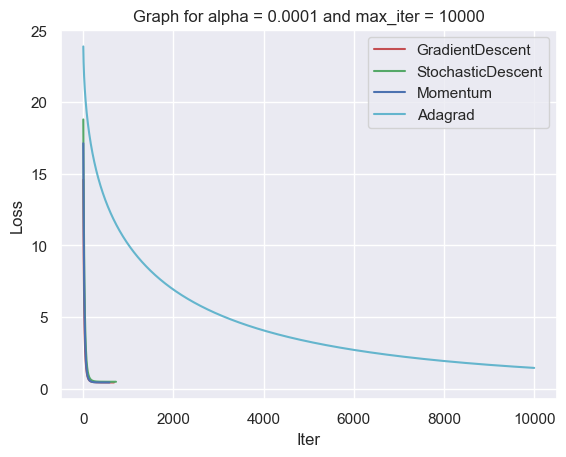

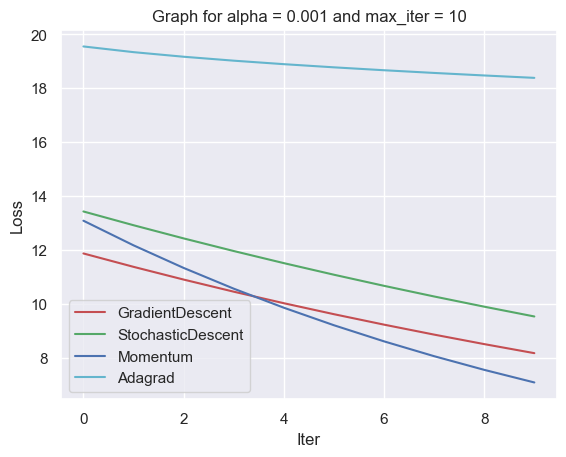

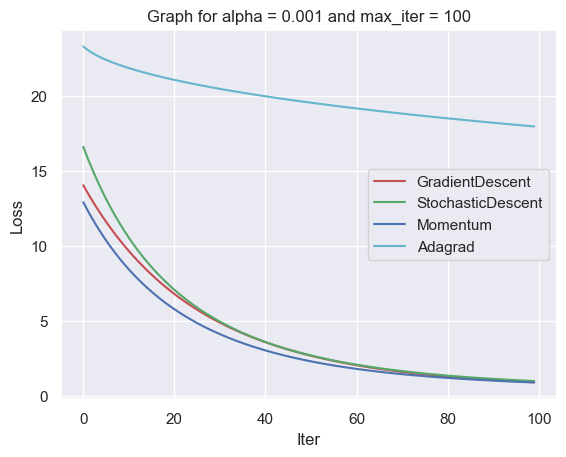

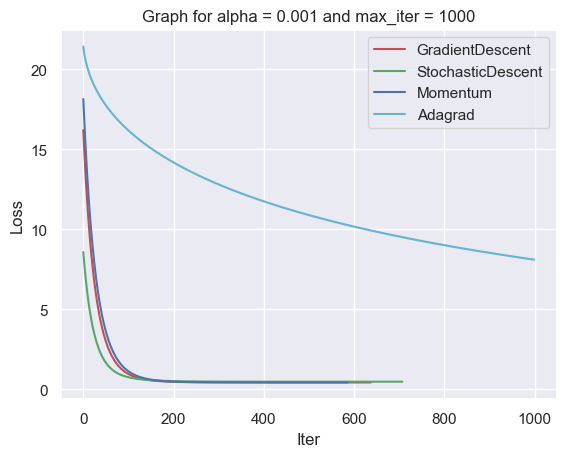

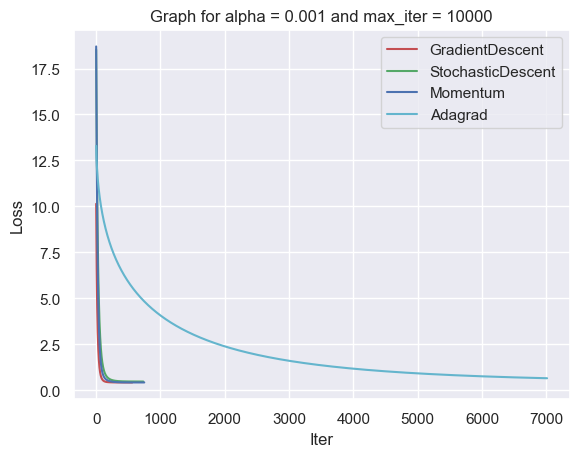

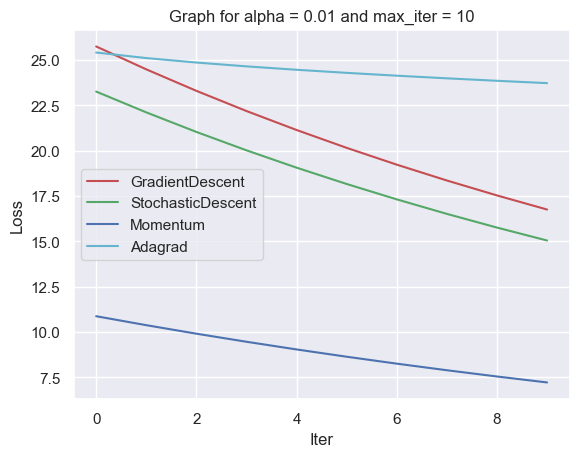

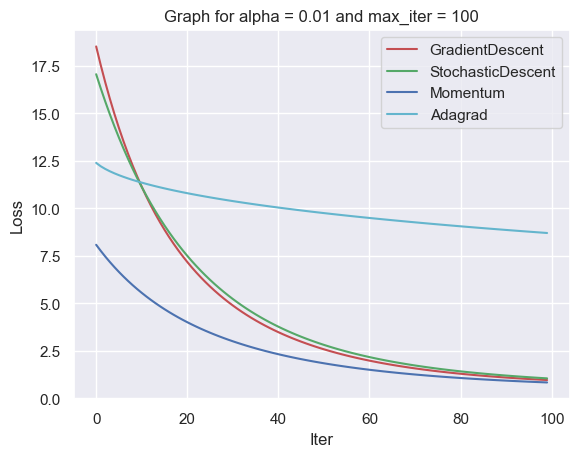

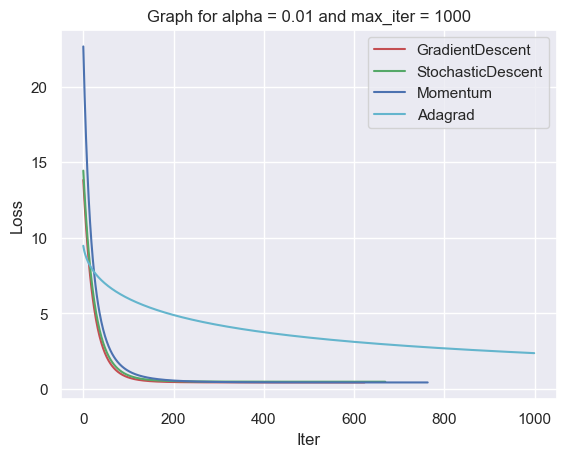

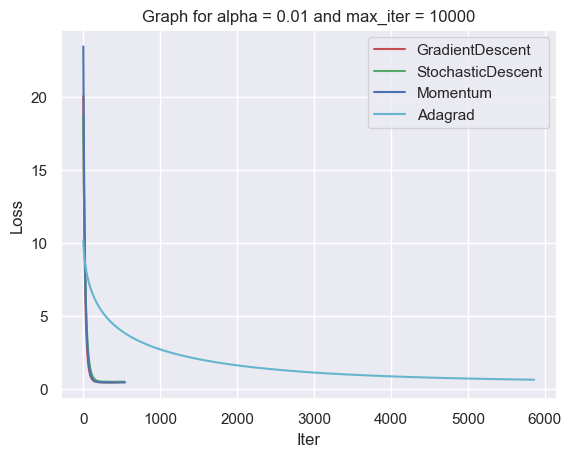

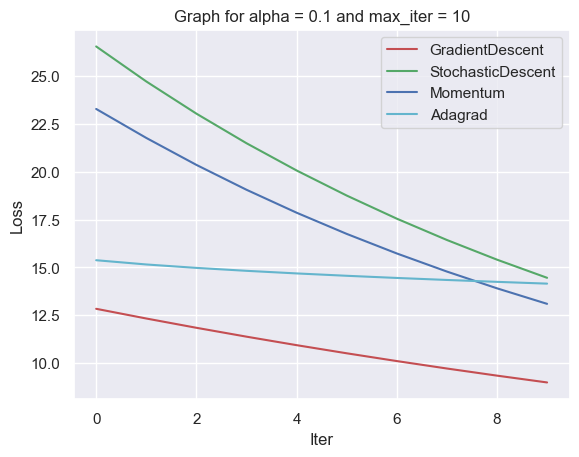

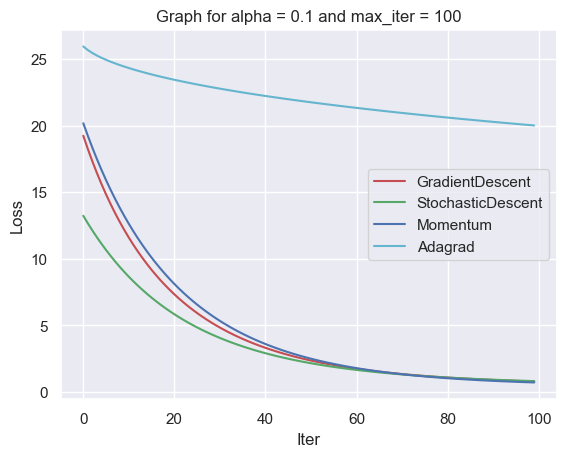

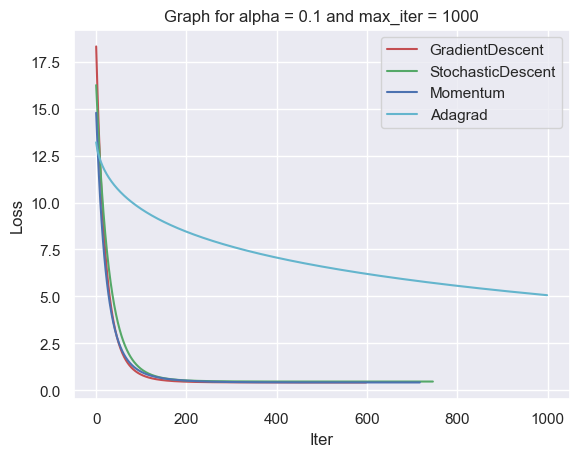

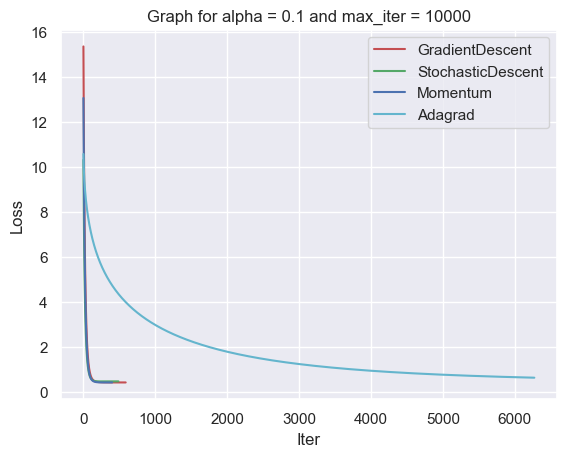

In [12]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'c']
labels = []
for i, ridge_model in enumerate(ridge_models):
    if (i%4==0):
        plt.figure()
    plt.plot(range(len(ridge_model.loss_history)), ridge_model.loss_history, color=colors[i%4])
    labels.append(ridge_model.gd_type)
    plt.xlabel('Iter')
    plt.ylabel('Loss')
    plt.legend(labels)
    t = "Graph for alpha = " + str(ridge_model.alpha) + " and max_iter = " + str(ridge_model.max_iter)
    plt.title(t)
plt.show()

We can see that GradientDescent,  StochasticDescen, and ( Momentushow somewhat similar results (which is expectable, as their formulas are rather similar). 
( Adag is the most unusual, and it often requires a larger number of iterations to train. 

Stochastic Gradient shows a higher rate of convergence than Gradient Descent (as it renewes parameters for each iteration). We can also see that the less the alpha and the higher the number of iterations, the more stable predictability as. It is especially evident when analysing graphs with the biggest alpha and smallest number of iterations, as the difference between models is too evident.rad